Dans ce notebook on va faire une pré-analyse des données de la Banque Mondiale qui sont réparties dans 5 fichiers :
- EdStatsCountry-Series.csv
- EdStatsFootNote.csv
- EdStatsCountry.csv
- EdStatsSeries.csv
- EdStatsData.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Analyse de "EdStatsCountry-Series.csv"

In [2]:
country_series = pd.read_csv("Edstats_csv/EdStatsCountry-Series.csv")
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [3]:
country_series.shape

(613, 4)

In [4]:
country_series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

La dernière colonne `Unnamed: 3` ne contient que des nan

Regardons ce que contient la colonne `DESCRIPTION`

In [5]:
country_series["DESCRIPTION"].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [6]:
# Nombre de pays répertoriés dans ce fichier
country_series["CountryCode"].unique().size

211

Sur ce jeu de données on trouve une description associée au receuil des indicateurs pour 211 pays et régions du monde. On trouve dans la colonne `DESCRIPTION` la source des données associées aux indicateurs pour les différents pays et les territoires inclus ou pas dans le pays concerné.

# Analyse de "EdStatsFootNote.csv"

In [7]:
foot_note = pd.read_csv("Edstats_csv/EdStatsFootNote.csv")
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
foot_note.shape

(643638, 5)

In [9]:
foot_note.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [10]:
foot_note["DESCRIPTION"].unique()[:100]

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate',
       '5-year average value between 0s and 5s',
       'Percentage includes lower secondary education.', 'Country data',
       'Country Data', 'UNSD WPP08 revision file 2A and 3A.',
       'Not applicable',
       'Percentage includes all tertiary levels (ISCED 5-8)', 'Estimated',
       'UIS estimation.', '<0.1. Plausible bound is <0.1-0.1',
       'Uncertainty bound is 127.1 - 148.2',
       'Uncertainty bound is 146.6 - 173.2',
       'Uncertainty bound is 134.1 - 157.1',
       'Uncertainty bound is 207.2 - 261.6',
       'Uncertainty bound is 60.2 - 86.1',
       'Uncertainty bound is 184.5 - 227.9',
       'Uncertainty bound is 167.8 - 201.7',
       'Uncertainty bound is 130.4 - 152.5',
       'Uncertainty bound is 240.3 - 308.5', 'Country estimation',
       'Uncertainty bound is 212.6 - 269.3',
       'Uncertainty bound is 201.4 - 253.3',
       'Uncertainty bound is 190.

In [11]:
# Vérification des doublons
foot_note.duplicated().sum()

0

Ce jeu de données contient également une description concernant la valeur des indicateurs pour chaque pays mais cette fois pour différentes années. On peut également y trouver des incertitudes pour certaines valeurs. Ces données pourraient être intéressantes pour une étude plus poussée que ce que nous voulons ici.

In [12]:
del foot_note

# Analyse de "EdStatsCountry.csv"

In [13]:
countries = pd.read_csv("Edstats_csv/EdStatsCountry.csv")
countries.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [14]:
countries.shape

(241, 32)

In [15]:
# on regarde s'il y a des doublons sur la colonne "Country Code"
countries["Country Code"].duplicated().sum()

0

In [16]:
countries.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

On calcule le taux de valeurs manquantes dans le tableau (sans prendre en compte la dernière colonne "Unnamed: 31")

In [17]:
# On supprime les colonnes ne contenant que des nan
countries = countries.dropna(axis=1, how="all")
countries.shape

(241, 31)

In [18]:
# Taux de valeurs manquantes
na_rate = countries.isna().sum().sum() / (241*31)
# ou bien
na_rate = countries.isna().mean().mean()
na_rate.round(2)

0.28

Ce jeu de données contient des informations relatives à 241 pays et régions du monde. La seule variable qui semble intéressante ici est la colonne "Income Group" qui classe les pays selon leurs revenus. On pourrait ne s'intéresser qu'aux pays riches car les populations y seront plus susceptibles de devenir clients.
Le tableau contient 28% de valeurs manquantes (sans compter la dernière colonne "Unnamed: 31").

# Analyse de "EdStatsSeries.csv"

In [19]:
indicators = pd.read_csv("Edstats_csv/EdStatsSeries.csv")
indicators.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
indicators.shape

(3665, 21)

In [21]:
indicators = indicators.dropna(axis=1, how="all")
indicators.shape

(3665, 15)

In [22]:
indicators.dtypes

Series Code                            object
Topic                                  object
Indicator Name                         object
Short definition                       object
Long definition                        object
Periodicity                            object
Base Period                            object
Other notes                            object
Aggregation method                     object
Limitations and exceptions             object
General comments                       object
Source                                 object
Statistical concept and methodology    object
Development relevance                  object
Related source links                   object
dtype: object

In [23]:
# on vérifie s'il y a des doublons
indicators["Series Code"].duplicated().sum()

0

Ce jeu de données contient la description des 3665 indicateurs. Il va nous permettre de déterminer lesquels peuvent nous intéresser
Les seuls colonnes qui vont nous intéresser ici sont le code de l'indicateur (`Series Code`), son sujet (`Topic`), son nom (`Indicator Name`) et sa définition (`Short definition`et `Long definition`).

In [24]:
indicators = indicators.loc[:, :"Long definition"]
indicators.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...


## Choix des indicateurs

Regardons les indicateurs qui peuvent nous intéresser. Pour commencer, regardons les différents sujets traités dans les données :

In [25]:
indicators["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Le sujet `Infrastructure: Communications` nous intéresse évidemment pour les cours en ligne

In [26]:
# regardons les indicateurs en lien avec ce sujet
indicators[indicators["Topic"] == "Infrastructure: Communications"]["Indicator Name"]

610    Personal computers (per 100 people)
611        Internet users (per 100 people)
Name: Indicator Name, dtype: object

Les deux indicateurs peuvent nous intéresser mais nous ne garderons que `Internet users (per 100 people)`.

In [27]:
# on stocke cet indicateur dans la variable internet
internet = indicators[indicators["Indicator Name"] == "Internet users (per 100 people)"]
internet

,Series Code,Topic,Indicator Name,Short definition,Long definition
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...


Le sujet `Population` peut nous intéresser pour connaître la population cible, à savoir la population en âge d'être au lycée ou dans le supérieur

In [28]:
s = indicators[indicators["Topic"] == "Population"]["Indicator Name"]
s.size

213

In [29]:
s.values

array(['Population, ages 3-5, female', 'Population, ages 3-5, male',
       'Population, ages 3-5, total', 'Population, ages 4-6, female',
       'Population, ages 4-6, male', 'Population, ages 4-6, total',
       'Population, ages 5-9, female', 'Population, ages 5-9, male',
       'Population, ages 5-9, total', 'Population, ages 5-10, female',
       'Population, ages 5-10, male', 'Population, ages 5-10, total',
       'Population, ages 5-11, female', 'Population, ages 5-11, male',
       'Population, ages 5-11, total', 'Population, ages 6-9, female',
       'Population, ages 6-9, male', 'Population, ages 6-9, total',
       'Population, ages 6-10, female', 'Population, ages 6-10, male',
       'Population, ages 6-10, total', 'Population, ages 6-11, female',
       'Population, ages 6-11, male', 'Population, ages 6-11, total',
       'Population, ages 6-12, female', 'Population, ages 6-12, male',
       'Population, ages 6-12, total', 'Population, ages 7-9, female',
       'Population

Nous allons retenir l'indicateur de la population totale âgée entre 15 et 24 ans : `Population, ages 15-24, total`

In [30]:
# on stocke cet indicateur dans la variable pop
pop = indicators[indicators["Indicator Name"] == "Population, ages 15-24, total"]
pop

,Series Code,Topic,Indicator Name,Short definition,Long definition
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop..."


Les sujets commençant par "Economic Policy & Debt" possèdent des indicateurs sur la richesse du pays. Cela va nous intéresser car les populations les plus riches seront plus susceptibles de devenir clients.

In [31]:
indicators[indicators["Topic"] == "Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita"]["Indicator Name"]

1668    GNI per capita, Atlas method (current US$)
Name: Indicator Name, dtype: object

In [32]:
indicators[indicators["Topic"] == "Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators"]["Indicator Name"]

1659               GDP (constant 2010 US$)
1663    GDP per capita (constant 2010 US$)
Name: Indicator Name, dtype: object

In [33]:
indicators[indicators["Topic"] == "Economic Policy & Debt: Purchasing power parity"]["Indicator Name"]

1660                   GDP, PPP (current international $)
1661             GDP, PPP (constant 2011 international $)
1664        GDP per capita, PPP (current international $)
1665    GDP per capita, PPP (constant 2011 internation...
1667                   GNI, PPP (current international $)
1669        GNI per capita, PPP (current international $)
Name: Indicator Name, dtype: object

In [34]:
indicators[indicators["Topic"] == "Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators"]["Indicator Name"]

1658               GDP (current US$)
1662    GDP per capita (current US$)
1666               GNI (current US$)
Name: Indicator Name, dtype: object

Il y a plusieurs indicateurs qui donnent le PIB (GDP) ou le RNB (GNI), la différence réside dans la méthode de calcul du PIB/RNB. Dans le suite on ne gardera que l'indicateur `GNI per capita, Atlas method (current US$)` pour comparer le revenu par habitant.

In [35]:
# on stocke cet indicateur dans la variable income
income = indicators[indicators["Topic"] == "Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita"]
income

,Series Code,Topic,Indicator Name,Short definition,Long definition
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...


Le sujet `Attainment` va nous intéresser car il possède des indicateurs sur les prévisions futures de la population pour différentes tranches d'âge en fonction du niveau d'étude.

In [36]:
s = indicators[indicators["Topic"] == "Attainment"]["Indicator Name"]
s.size

733

In [37]:
s[s.str.contains("Projection")].values

array(['Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Male',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Total',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Male',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Male',


Nous allons retenir les indicateurs pour les populations âgée entre 15 et 24 ans qui auront au moins atteint le lycée (upper secondary).

In [38]:
# liste des indicateurs qui nous intéressent
liste = ["Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total",
         "Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total",
         "Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total",
         "Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total",
        ]
# on va utiliser un masque
condition = indicators["Indicator Name"] == liste[0]
for val in liste[1:]:
    cond = indicators["Indicator Name"] == val
    condition = condition | cond
# on sélectionne les indicateurs et on les met dans la variable projection
projection = indicators[condition]
projection["Indicator Name"].values

array(['Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total',
       'Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total'],
      dtype=object)

**Après avoir sélectionner les indicateurs qui nous intéressaient, on les regroupe dans la variable indicators (qui contient initialement tous les indicateurs)**

In [39]:
indicators = pd.concat([internet, income, pop, projection])
indicators

,Series Code,Topic,Indicator Name,Short definition,Long definition
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop..."
1930,PRJ.POP.1519.3.MF,Attainment,Projection: Population age 15-19 in thousands ...,NaN,Total population in thousands in the specified...
1933,PRJ.POP.1519.4.MF,Attainment,Projection: Population age 15-19 in thousands ...,NaN,Total population in thousands in the specified...
1948,PRJ.POP.2024.3.MF,Attainment,Projection: Population age 20-24 in thousands ...,NaN,Total population in thousands in the specified...
1951,PRJ.POP.2024.4.MF,Attainment,Projection: Population age 20-24 in thousands ...,NaN,Total population in thousands in the specified...


# Analyse de "EdStatsData.csv"

In [40]:
data = pd.read_csv("Edstats_csv/EdStatsData.csv")
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data = data.drop(columns="Unnamed: 69")
data.shape

(886930, 69)

In [42]:
# Taux de valeurs manquantes
na_rate = data.isna().mean().mean()
na_rate.round(2)

0.86

In [43]:
# Vérification des doublons
data.loc[:, :"Indicator Code"].duplicated().sum()

0

Ce jeu de données contient les valeurs de chaque indicateur pour les différents pays, c'est là que se trouvent les données qui nous intéressent. Les valeurs d'un indicateur pour un pays donné sont réparties en colonnes en fonction de l'année, allant de 1970 pour les valeurs les plus anciennes jusqu'à 2100 pour les prévisions.
Le tableau contient 86% de valeurs manquantes mais nous ne seront intéressés que par les valeurs les plus récentes et les valeurs futures pour les prévisions.

# Nettoyage des data

## On ne garde que les pays riches

In [44]:
mask1 = countries["Income Group"] == "High income: nonOECD"
mask2 = countries["Income Group"] == "High income: OECD"
high_income_countries = countries[mask1 | mask2]

data = data[data["Country Code"].isin(high_income_countries["Country Code"])]
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
106285,Andorra,AND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106286,Andorra,AND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106287,Andorra,AND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106288,Andorra,AND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106289,Andorra,AND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.shape

(274875, 69)

## On ne garde que les data pour les indicateurs qui nous intéressent

In [46]:
data = data[data["Indicator Code"].isin(indicators["Series Code"])]
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
107536,Andorra,AND,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108767,Andorra,AND,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109881,Andorra,AND,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109887,Andorra,AND,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data.shape

(525, 69)

## On supprime les pays associés aux lignes qui ne contiennent que des nan

In [48]:
# data privée des 4 premières colonnes et des lignes ne contenant que des nan
df = data.iloc[:, 4:].dropna(how="all")

# lignes à supprimer:
rows_to_del = [i for i in data.index if i not in df.index]

# liste des pays qui vont être supprimés
deleted_countries = data.loc[rows_to_del,:]["Country Name"].unique()
print(deleted_countries)

mask = data["Country Name"].isin(deleted_countries)
data = data[~mask]
data.shape

['Andorra' 'Antigua and Barbuda' 'Aruba' 'Barbados' 'Bermuda'
 'Brunei Darussalam' 'Cayman Islands' 'Channel Islands' 'Curacao'
 'Faroe Islands' 'French Polynesia' 'Greenland' 'Guam' 'Isle of Man'
 'Liechtenstein' 'Monaco' 'New Caledonia' 'Northern Mariana Islands'
 'Oman' 'Puerto Rico' 'San Marino' 'Sint Maarten (Dutch part)'
 'St. Kitts and Nevis' 'St. Martin (French part)'
 'Turks and Caicos Islands' 'Virgin Islands (U.S.)']


(343, 69)

On sépare les données liées aux différentes variables en plusieurs DataFrame

In [49]:
# donées liées à internet
mask = data["Indicator Name"] == "Internet users (per 100 people)"
data_internet = data[mask]

# données liées aux revenus
mask = data["Indicator Name"] == "GNI per capita, Atlas method (current US$)"
data_income = data[mask]

# données liées à la population
mask = data["Indicator Name"].isin(pop["Indicator Name"])
data_pop = data[mask]

# données liées aux prévision de la population
mask = data["Indicator Code"].isin(projection["Series Code"])
data_projection = data[mask]

## data liées à internet

In [50]:
data_internet.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133315,Austria,AUT,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140645,"Bahamas, The",BHS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144310,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158970,Belgium,BEL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data_internet.shape

(49, 69)

In [52]:
# On vérifie s'il y a des doublons
data_internet["Country Name"].duplicated().sum()

0

On ne garde que les valeurs les plus récentes

In [53]:
country_names = []
dates = []
values = []
for i in np.arange(data_internet.shape[0]): # on parcourt les lignes
    s = data_internet.iloc[i,:] # on met la ligne dans s
    # on parcourt les colonnes depuis la dernière ('2100') jusqu'à tomber sur une
    # valeur non nulle
    j = s.size-1
    while pd.isna(s[j]) == True:
        j -= 1
    # l'indice j correspond à la dernière valeur non nulle
    country_names.append(s["Country Name"])
    dates.append(int(s.index[j])) # on convertit la date en int
    values.append(s[j])

data_internet = pd.DataFrame({"Country Name":country_names,
                              "Internet users": values,
                              "dates": dates
                             })
data_internet.head()

,Country Name,Internet users,dates
0,Australia,88.238658,2016
1,Austria,84.323331,2016
2,"Bahamas, The",80.000000,2016
3,Bahrain,97.999981,2016
4,Belgium,86.516500,2016


On vérifie que les données datent toutes de la même année

In [54]:
data_internet["dates"].unique()

array([2016])

On enlève la colonne `dates` car elle n'est plus utile

In [55]:
data_internet = data_internet.drop(columns="dates")
data_internet.head()

,Country Name,Internet users
0,Australia,88.238658
1,Austria,84.323331
2,"Bahamas, The",80.000000
3,Bahrain,97.999981
4,Belgium,86.516500


In [56]:
data_internet.shape

(49, 2)

In [57]:
data_internet.describe()

,Internet users
count,49.000000
mean,81.728470
std,12.559358
min,23.780000
25%,75.900360
50%,81.642985
75%,89.840000
max,98.240016


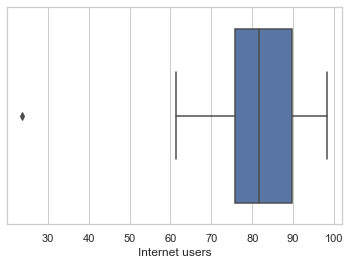

In [58]:
ax = sns.boxplot(x="Internet users", data=data_internet)

## data liées aux revenus

In [59]:
data_income.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
129526,Australia,AUS,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,3280.0,3480.0,3890.0,4660.0,5960.0,7230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133191,Austria,AUT,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2060.0,2320.0,2760.0,3580.0,4650.0,5540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140521,"Bahamas, The",BHS,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2920.0,3110.0,3190.0,3740.0,3840.0,4640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144186,Bahrain,BHR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158846,Belgium,BEL,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2800.0,3090.0,3660.0,4710.0,6020.0,6940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data_income.shape

(49, 69)

Regardons les dates les plus récentes pour lesquelles il y a des données

In [61]:
#country_names = []
dates = []
for i in np.arange(data_income.shape[0]): # on parcourt les lignes
    s = data_income.iloc[i,:] # on met la ligne dans s
    # on parcourt les colonnes depuis la dernière ('2100') jusqu'à tomber sur une
    # valeur non nulle
    j = s.size-1
    while pd.isna(s[j]) == True:
        j -= 1
    # l'indice j correspond à la dernière valeur non nulle
    #country_names.append(s["Country Name"])
    dates.append(int(s.index[j])) # on convertit la date en int
# on regarde les valeurs uniques dans dates
set(dates)

{2015, 2016}

On voit que certains pays ont des données jusqu'en 2015 et d'autres jusqu'en 2016. Pour les comparer, on va retenir la moyenne des valeurs entre 2013 et 2016 pour tous les pays. On va mettre cette moyenne dans une colonne `GNI per capita`

In [62]:
data_income["GNI per capita"] = data_income.loc[:, "2013":"2016"].mean(axis=1)
data_income[["2013", "2014", "2015", "2016", "GNI per capita"]].head()

<ipython-input-62-90bd0a818e65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_income["GNI per capita"] = data_income.loc[:, "2013":"2016"].mean(axis=1)


,2013,2014,2015,2016,GNI per capita
129526,65640.0,64860.0,60330.0,54420.0,61312.500000
133191,50750.0,50400.0,47610.0,45790.0,48637.500000
140521,25060.0,26780.0,26130.0,26490.0,26115.000000
144186,21710.0,21010.0,22660.0,NaN,21793.333333
158846,47330.0,46940.0,44340.0,41820.0,45107.500000


On ne garde que les colonnes `Country Name` et `GNI per capita`

In [63]:
data_income = data_income.iloc[:, [0, -1]]
data_income.head()

,Country Name,GNI per capita
129526,Australia,61312.500000
133191,Austria,48637.500000
140521,"Bahamas, The",26115.000000
144186,Bahrain,21793.333333
158846,Belgium,45107.500000


In [64]:
data_income.describe()

,GNI per capita
count,49.000000
mean,38137.227891
std,20947.022703
min,10792.500000
25%,20730.000000
50%,40095.000000
75%,48820.000000
max,96337.500000


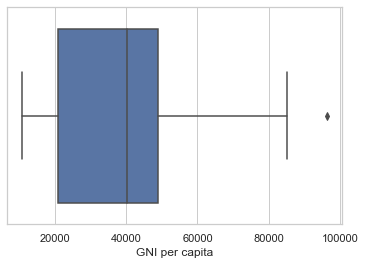

In [65]:
ax = sns.boxplot(x=data_income["GNI per capita"])

On regroupe les data avec une jointure interne. La colonne commune aux DataFrame est la colonne `Country Name`, la jointure va donc se faire sur cette colonne automatiquement.

In [66]:
data = pd.merge(data_internet, data_income)

## data liées à la population

In [67]:
data_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
130757,Australia,AUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134422,Austria,AUT,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141752,"Bahamas, The",BHS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145417,Bahrain,BHR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160077,Belgium,BEL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
data_pop.shape

(49, 69)

In [69]:
# on supprime les colonnes qui ne contiennent que des nan
data_pop = data_pop.dropna(axis="columns", how="all")

# on supprime les données antérieures à 2010
data_pop = data_pop.drop(columns=data_pop.loc[:, "Country Code":"2009"].columns)

In [70]:
data_pop.shape

(49, 7)

In [71]:
# on regarde s'il y a des valeurs manquantes
data_pop.isna().mean()

Country Name    0.0
2010            0.0
2011            0.0
2012            0.0
2013            0.0
2014            0.0
2015            0.0
dtype: float64

In [72]:
# on ne garde que les noms des pays et les données datant de 2015
data_pop = data_pop.iloc[:, [0,-1]]
data_pop.head()

,Country Name,2015
130757,Australia,2914620.0
134422,Austria,964629.0
141752,"Bahamas, The",61260.0
145417,Bahrain,132609.0
160077,Belgium,1241946.0


In [73]:
# on renomme la colonne `2015` en `Population`
data_pop = data_pop.rename(columns={"2015": "Population"})
data_pop.head()

,Country Name,Population
130757,Australia,2914620.0
134422,Austria,964629.0
141752,"Bahamas, The",61260.0
145417,Bahrain,132609.0
160077,Belgium,1241946.0


In [74]:
data_pop.describe()

,Population
count,4.900000e+01
mean,3.114512e+06
std,6.941752e+06
min,4.457000e+04
25%,2.269000e+05
50%,7.436080e+05
75%,2.914620e+06
max,4.514752e+07


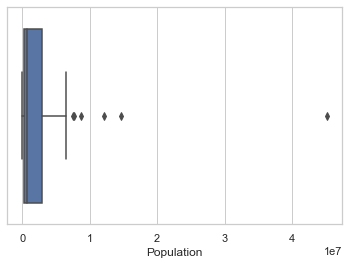

In [75]:
ax = sns.boxplot(x=data_pop["Population"])

On regroupe les données

In [76]:
data = pd.merge(data, data_pop)

## data liées aux prévisions de la population

In [77]:
data_projection.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
131871,Australia,AUS,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,33.88,35.78,37.38,38.59,39.31,39.61,39.70,39.72,39.62,39.28
131877,Australia,AUS,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,1441.62,1510.77,1569.06,1611.50,1634.36,1640.60,1638.96,1635.36,1627.24,1610.01
131889,Australia,AUS,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,727.93,760.56,790.19,815.29,832.70,840.37,839.79,835.47,830.33,823.02
131895,Australia,AUS,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,1227.91,1240.07,1249.26,1252.91,1246.76,1228.55,1201.13,1171.22,1142.60,1113.36
135536,Austria,AUT,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,14.82,15.22,15.70,15.98,15.94,15.71,15.39,15.13,14.92,14.68


In [78]:
data_projection.shape

(196, 69)

On a 196 lignes car nous avons 4 indicateurs, chaque pays apparaît donc 4 fois. Comme nous avons 49 pays, on retrouve bien $49 \times 4 = 196$

In [79]:
# on supprime les colonnes qui ne contiennent que des nan
data_projection = data_projection.dropna(axis="columns", how="all")
data_projection.shape

(196, 23)

In [80]:
data_projection.isna().mean()

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
2010              0.0
2015              0.0
2020              0.0
2025              0.0
2030              0.0
2035              0.0
2040              0.0
2045              0.0
2050              0.0
2055              0.0
2060              0.0
2065              0.0
2070              0.0
2075              0.0
2080              0.0
2085              0.0
2090              0.0
2095              0.0
2100              0.0
dtype: float64

On va faire la moyenne des prédictions entre 2020 et 2040

In [81]:
# On regroupe les données par pays en sommant les valeurs de chaque indicateur
data_projection = data_projection.groupby("Country Name").sum()

# Le groupby a mis les noms de pays en indice, on les remet en colonne:
data_projection = data_projection.reset_index(level=0)

# On rajoute une colonne qui correspond à la moyenne des valeurs entre 2020 et 2035
data_projection["Projection"] = data_projection.loc[:,"2020":"2040"].mean(axis="columns")

# On supprime toutes les colonnes sauf la première et la dernière
columns_to_del = data_projection.iloc[0,1:-1].index
data_projection = data_projection.drop(columns=columns_to_del)

data_projection.head()

,Country Name,Projection
0,Australia,2854.898
1,Austria,500.194
2,"Bahamas, The",12.572
3,Bahrain,166.126
4,Belgium,920.386


In [82]:
data_projection.describe()

,Projection
count,49.000000
mean,1973.386816
std,4413.485082
min,12.572000
25%,154.758000
50%,500.194000
75%,2366.800000
max,28329.300000


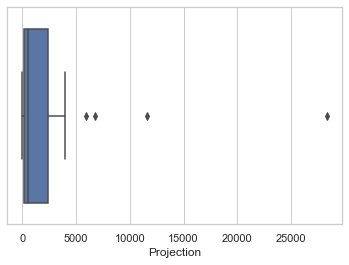

In [83]:
ax = sns.boxplot(x=data_projection["Projection"])

On regroupe les données

In [84]:
data = pd.merge(data, data_projection)
data.head()

,Country Name,Internet users,GNI per capita,Population,Projection
0,Australia,88.238658,61312.500000,2914620.0,2854.898
1,Austria,84.323331,48637.500000,964629.0,500.194
2,"Bahamas, The",80.000000,26115.000000,61260.0,12.572
3,Bahrain,97.999981,21793.333333,132609.0,166.126
4,Belgium,86.516500,45107.500000,1241946.0,920.386


In [85]:
data.shape

(49, 5)

# Scoring

In [86]:
# Création du score INTERNET
data["SCORE_INTERNET"] = data["Internet users"] / data["Internet users"].max()

# Création du score INCOME
data["SCORE_INCOME"] = data["GNI per capita"] / data["GNI per capita"].max()

# Création du score POPULATION
data["SCORE_POPULATION"] = data["Population"] / data["Population"].max()

# Création du score PROJECTION
data["SCORE_PROJECTION"] = data["Projection"] / data["Projection"].max()

data.head()

,Country Name,Internet users,GNI per capita,Population,Projection,SCORE_INTERNET,SCORE_INCOME,SCORE_POPULATION,SCORE_PROJECTION
0,Australia,88.238658,61312.500000,2914620.0,2854.898,0.898195,0.636434,0.064558,0.100775
1,Austria,84.323331,48637.500000,964629.0,500.194,0.858340,0.504866,0.021366,0.017656
2,"Bahamas, The",80.000000,26115.000000,61260.0,12.572,0.814332,0.271078,0.001357,0.000444
3,Bahrain,97.999981,21793.333333,132609.0,166.126,0.997557,0.226219,0.002937,0.005864
4,Belgium,86.516500,45107.500000,1241946.0,920.386,0.880665,0.468224,0.027509,0.032489


In [87]:
# On vérifie qu'il n'y a pas de nan
data.isna().sum()

Country Name        0
Internet users      0
GNI per capita      0
Population          0
Projection          0
SCORE_INTERNET      0
SCORE_INCOME        0
SCORE_POPULATION    0
SCORE_PROJECTION    0
dtype: int64

## Calcul du score total

On calcul le score total en faisant la moyenne (non pondérée) des 4 scores

In [88]:
data["SCORE_TOTAL"] = (data["SCORE_INCOME"]
                              + data["SCORE_INTERNET"]
                              + data["SCORE_POPULATION"]
                              + data["SCORE_PROJECTION"]) / 4
data.head()

,Country Name,Internet users,GNI per capita,Population,Projection,SCORE_INTERNET,SCORE_INCOME,SCORE_POPULATION,SCORE_PROJECTION,SCORE_TOTAL
0,Australia,88.238658,61312.500000,2914620.0,2854.898,0.898195,0.636434,0.064558,0.100775,0.424991
1,Austria,84.323331,48637.500000,964629.0,500.194,0.858340,0.504866,0.021366,0.017656,0.350557
2,"Bahamas, The",80.000000,26115.000000,61260.0,12.572,0.814332,0.271078,0.001357,0.000444,0.271803
3,Bahrain,97.999981,21793.333333,132609.0,166.126,0.997557,0.226219,0.002937,0.005864,0.308144
4,Belgium,86.516500,45107.500000,1241946.0,920.386,0.880665,0.468224,0.027509,0.032489,0.352221


In [89]:
# Regardons les 10 premiers
data[["Country Name", "SCORE_TOTAL"]].sort_values("SCORE_TOTAL", ascending=False)[:10]

,Country Name,SCORE_TOTAL
47,United States,0.837924
32,Norway,0.504033
22,Japan,0.471109
43,Switzerland,0.457579
35,Qatar,0.449827
27,Luxembourg,0.440670
46,United Kingdom,0.430388
15,Germany,0.426542
0,Australia,0.424991
14,France,0.419519


In [90]:
data.columns[:-6:-1]

Index(['SCORE_TOTAL', 'SCORE_PROJECTION', 'SCORE_POPULATION', 'SCORE_INCOME',
       'SCORE_INTERNET'],
      dtype='object')

In [91]:
sns.set_context("talk") # for the font size

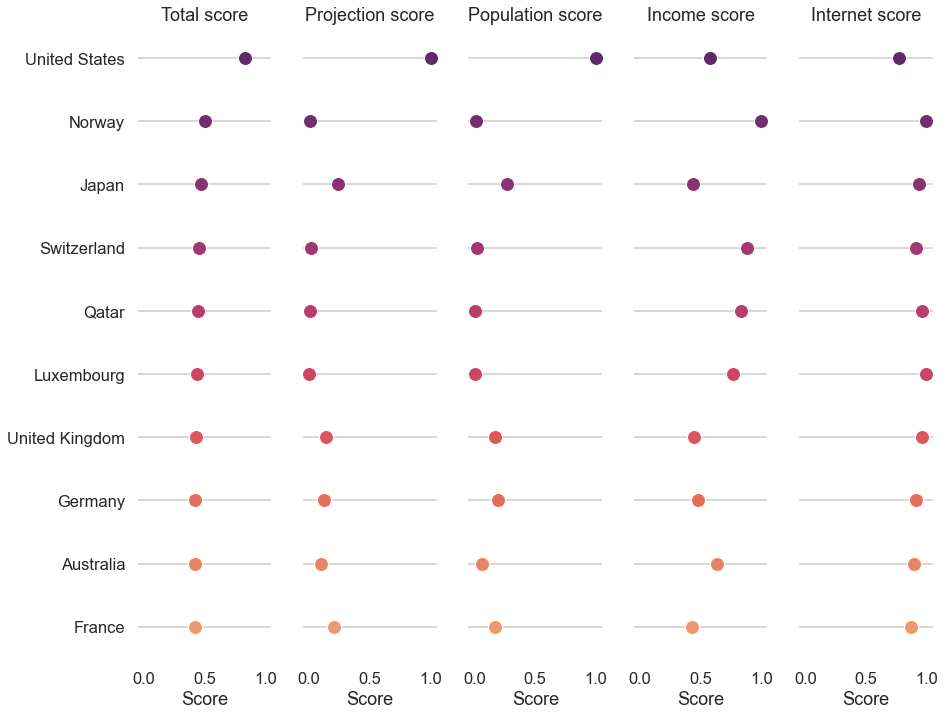

In [92]:
top_ten = data.sort_values("SCORE_TOTAL", ascending=False)[:10]

# Make the PairGrid
g = sns.PairGrid(top_ten,
                 x_vars=top_ten.columns[:-6:-1],
                 y_vars=["Country Name"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=14, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Draw a bar plot using the barplot function
#g.map(sns.barplot, palette="flare_r")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.05, 1.05), xlabel="Score", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total score", "Projection score", "Population score",
          "Income score", "Internet score"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xticks([0, 0.5, 1])
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
sns.despine(left=True, bottom=True)

Notons la très forte corrélation entre les indicateurs `Population` et `Projection`

In [93]:
data[['SCORE_POPULATION', 'SCORE_PROJECTION']].corr()

,SCORE_POPULATION,SCORE_PROJECTION
SCORE_POPULATION,1.000000,0.990891
SCORE_PROJECTION,0.990891,1.000000


# Deuxième méthode : avec un score total pondéré

On va affecter un poids deux fois plus importants pour les variables `Population` et `Projection`

In [94]:
data.loc[:, "SCORE_TOTAL"] = (data["SCORE_INCOME"]
                              + data["SCORE_INTERNET"]
                              + 2 * data["SCORE_POPULATION"]
                              + 2 * data["SCORE_PROJECTION"]) / 6

Voyons si le classement a changé

In [95]:
top_ten_2 = data.sort_values("SCORE_TOTAL", ascending=False)[:10]
top_ten_2[["Country Name", "SCORE_TOTAL"]]

,Country Name,SCORE_TOTAL
47,United States,0.891949
22,Japan,0.399002
36,Russian Federation,0.396304
14,France,0.342397
32,Norway,0.340308
46,United Kingdom,0.338614
15,Germany,0.336724
5,Canada,0.314780
43,Switzerland,0.311170
0,Australia,0.310883


Pays qui sont sortis du top 10

In [96]:
top_ten[~top_ten["Country Name"].isin(top_ten_2["Country Name"])]["Country Name"]

35         Qatar
27    Luxembourg
Name: Country Name, dtype: object

Pays qui ont intégré le top 10

In [97]:
top_ten_2[~top_ten_2["Country Name"].isin(top_ten["Country Name"])]["Country Name"]

36    Russian Federation
5                 Canada
Name: Country Name, dtype: object

Après avoir fait une moyenne pondérée où les variables `Population` et `Projection` ont un poids deux fois supérieurs aux autres, le Qatar et le Luxembourg sont sortis du top 10 et la Russie et le Canada l'ont intégré.

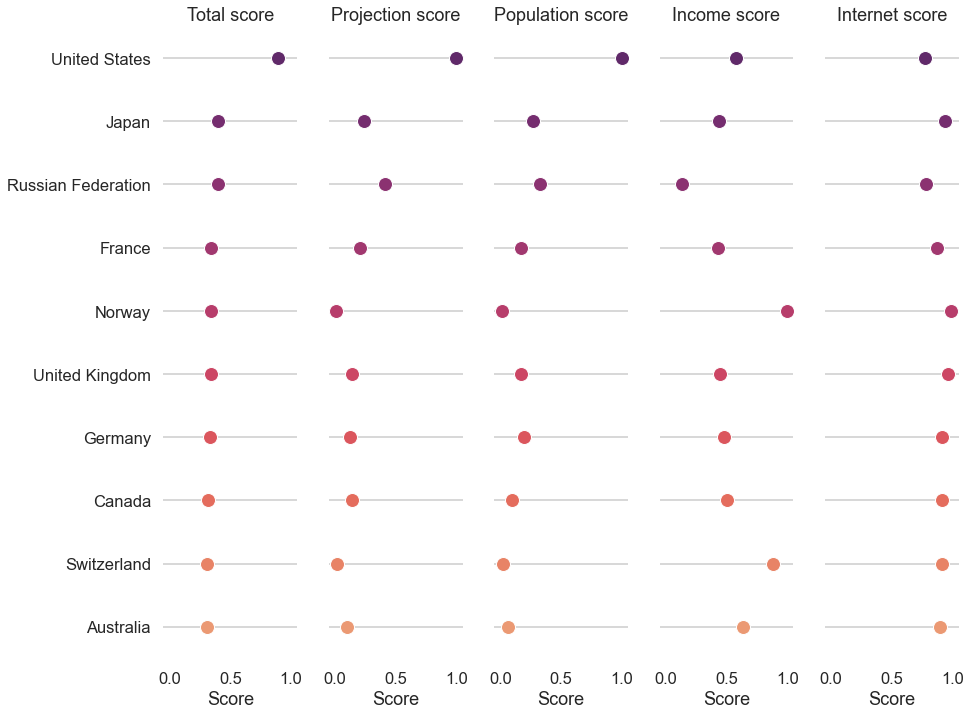

In [98]:
# Make the PairGrid
g = sns.PairGrid(top_ten_2,
                 x_vars=top_ten_2.columns[:-6:-1],
                 y_vars=["Country Name"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=14, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Draw a bar plot using the barplot function
#g.map(sns.barplot, palette="flare_r")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.05, 1.05), xlabel="Score", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total score", "Projection score", "Population score",
          "Income score", "Internet score"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xticks([0, 0.5, 1])
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
sns.despine(left=True, bottom=True)

# Troisième méthode : fusionner les variables `Population` et `Internet`

On crée une nouvelle variable `Target population` qui va représenter la population des 15-24 ans ayant accès à internet. On obtient cette variable en multipliant la variable `Population` avec la variable `Internet users` (divisés par 100 car c'est un pourcentage). Cela suppose que le pourcentage de la population ayant accès à internet est e même pour toutes les tranches d'âge, ce qui n'est pas forcément le cas. On peut effectivement s'attendre à ce que les 15-24 ans aient un plus grand accès à internet, mais pour simplifier le modèle on va supposer que ce n'est pas le cas.

On ne va cependant pas appliquer la même opération à la variable `Projection` en supposant que la population des 15-24 ans ayant atteint le lycée ou le supérieur ont tous accès à internet.

In [99]:
data["Target population"] = data["Population"] * (data["Internet users"] / 100)
data.head()

,Country Name,Internet users,GNI per capita,Population,Projection,SCORE_INTERNET,SCORE_INCOME,SCORE_POPULATION,SCORE_PROJECTION,SCORE_TOTAL,Target population
0,Australia,88.238658,61312.500000,2914620.0,2854.898,0.898195,0.636434,0.064558,0.100775,0.310883,2.571822e+06
1,Austria,84.323331,48637.500000,964629.0,500.194,0.858340,0.504866,0.021366,0.017656,0.240208,8.134073e+05
2,"Bahamas, The",80.000000,26115.000000,61260.0,12.572,0.814332,0.271078,0.001357,0.000444,0.181502,4.900800e+04
3,Bahrain,97.999981,21793.333333,132609.0,166.126,0.997557,0.226219,0.002937,0.005864,0.206896,1.299568e+05
4,Belgium,86.516500,45107.500000,1241946.0,920.386,0.880665,0.468224,0.027509,0.032489,0.244814,1.074488e+06


On crée le score associée à la nouvelle variable

In [100]:
data["SCORE_TARGET"] = data["Target population"] / data["Target population"].max()
data.head()

,Country Name,Internet users,GNI per capita,Population,Projection,SCORE_INTERNET,SCORE_INCOME,SCORE_POPULATION,SCORE_PROJECTION,SCORE_TOTAL,Target population,SCORE_TARGET
0,Australia,88.238658,61312.500000,2914620.0,2854.898,0.898195,0.636434,0.064558,0.100775,0.310883,2.571822e+06,0.074780
1,Austria,84.323331,48637.500000,964629.0,500.194,0.858340,0.504866,0.021366,0.017656,0.240208,8.134073e+05,0.023651
2,"Bahamas, The",80.000000,26115.000000,61260.0,12.572,0.814332,0.271078,0.001357,0.000444,0.181502,4.900800e+04,0.001425
3,Bahrain,97.999981,21793.333333,132609.0,166.126,0.997557,0.226219,0.002937,0.005864,0.206896,1.299568e+05,0.003779
4,Belgium,86.516500,45107.500000,1241946.0,920.386,0.880665,0.468224,0.027509,0.032489,0.244814,1.074488e+06,0.031242


On enlève les colonnes associées aux variables `Population` et `Internet users`

In [101]:
data.columns

Index(['Country Name', 'Internet users', 'GNI per capita', 'Population',
       'Projection', 'SCORE_INTERNET', 'SCORE_INCOME', 'SCORE_POPULATION',
       'SCORE_PROJECTION', 'SCORE_TOTAL', 'Target population', 'SCORE_TARGET'],
      dtype='object')

In [102]:
data = data[['Country Name', 'Target population', 'GNI per capita',
       'Projection', 'SCORE_TARGET', 'SCORE_INCOME',
       'SCORE_PROJECTION', 'SCORE_TOTAL']]
data.head()

,Country Name,Target population,GNI per capita,Projection,SCORE_TARGET,SCORE_INCOME,SCORE_PROJECTION,SCORE_TOTAL
0,Australia,2.571822e+06,61312.500000,2854.898,0.074780,0.636434,0.100775,0.310883
1,Austria,8.134073e+05,48637.500000,500.194,0.023651,0.504866,0.017656,0.240208
2,"Bahamas, The",4.900800e+04,26115.000000,12.572,0.001425,0.271078,0.000444,0.181502
3,Bahrain,1.299568e+05,21793.333333,166.126,0.003779,0.226219,0.005864,0.206896
4,Belgium,1.074488e+06,45107.500000,920.386,0.031242,0.468224,0.032489,0.244814


In [103]:
data["SCORE_TOTAL"] = (data["SCORE_TARGET"]
                      + data["SCORE_INCOME"]
                      + data["SCORE_PROJECTION"]
                      ) / 3

In [104]:
top_ten_3 = data[["Country Name", "SCORE_TOTAL"]].sort_values("SCORE_TOTAL", ascending=False)[:10]
top_ten_3

,Country Name,SCORE_TOTAL
47,United States,0.858760
32,Norway,0.343231
22,Japan,0.334630
43,Switzerland,0.307977
36,Russian Federation,0.288907
35,Qatar,0.280062
15,Germany,0.275881
14,France,0.275766
0,Australia,0.270663
46,United Kingdom,0.266209


On compare avec le classement obtenu par la première méthode

Pays qui sont sortis du top 10

In [105]:
top_ten[~top_ten["Country Name"].isin(top_ten_3["Country Name"])]["Country Name"]

27    Luxembourg
Name: Country Name, dtype: object

Pays qui ont intégré le top 10

In [106]:
top_ten_3[~top_ten_3["Country Name"].isin(top_ten["Country Name"])]["Country Name"]

36    Russian Federation
Name: Country Name, dtype: object